In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


## Exploratory Data Analysis

Text(0.5, 1.0, 'Height vs Weight')

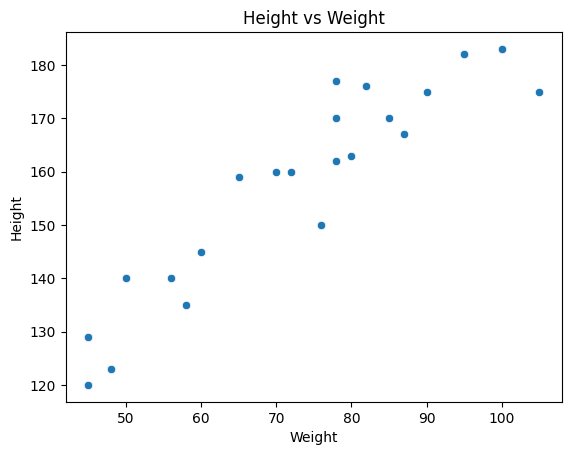

In [5]:
sns.scatterplot(data=df, x='Weight', y='Height')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")

<Axes: >

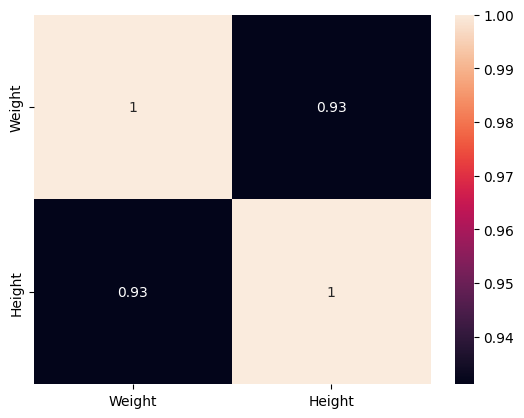

In [6]:
sns.heatmap(df.corr(), annot=True)

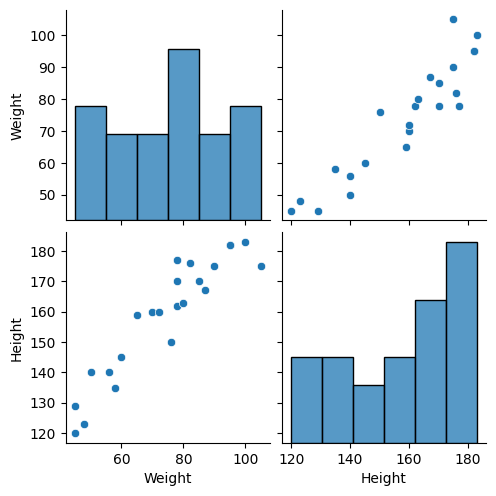

In [7]:
sns.pairplot(df)

## Independent and Dependent Features

In [8]:
X = df[['Weight']]
y = df['Height']

## Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
X_train.shape

(18, 1)

## Standardization

In [11]:
scalar = StandardScaler()

In [12]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

<Axes: ylabel='Height'>

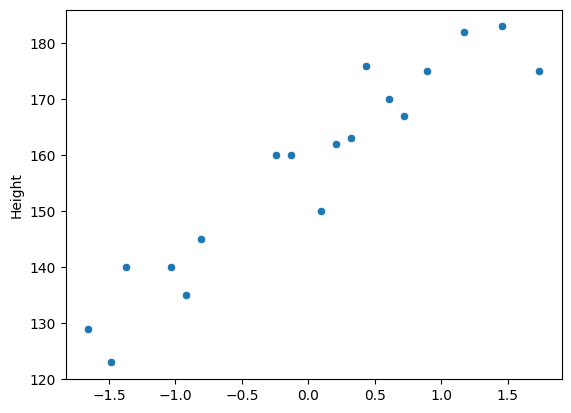

In [15]:
sns.scatterplot(x=X_train.squeeze(), y=y_train)

## Apply Linear Regression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
print(f"Coefficient or slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficient or slope: [17.03440872]
Intercept: 157.5


### Plot Training Data with Best Fit Line

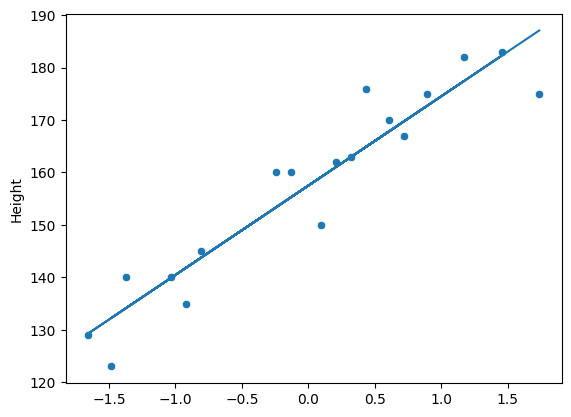

In [19]:
sns.scatterplot(x=X_train.squeeze(), y=y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction

In [20]:
y_pred = regression.predict(X_test)

In [21]:
def adjusted_r_square(r_score, number_of_samples, number_of_features):
    residual = (1 - r_score) * (len(number_of_samples) - 1)
    total = (len(number_of_samples) - number_of_features.shape[1] - 1)
    adjusted_r_score = 1 - (residual / total)
    return adjusted_r_score

In [23]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_true=y_test, y_pred=y_pred)
adjusted_r_score = adjusted_r_square(r_score=r2_score, number_of_samples=y_test, number_of_features=X_test)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2_score}")
print(f"Adjusted R-square Score: {adjusted_r_score}")

Mean Absolute Error: 9.822657814519232
Mean Squared Error: 109.77592599051664
Root Mean Squared Error: 10.477400726827081
R-squared Score: 0.776986986042344
Adjusted R-square Score: 0.7026493147231252


### Prediction for New Data

In [24]:
regression.predict(scalar.transform([[72]]))

C:\Users\tariq\data_science_journey\MachineLearning-NLP-MLOps-Deployment-Bootcamp\01-Python-Programming\python-venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])

### Plotting Residuals

In [25]:
residuals = y_test - y_pred

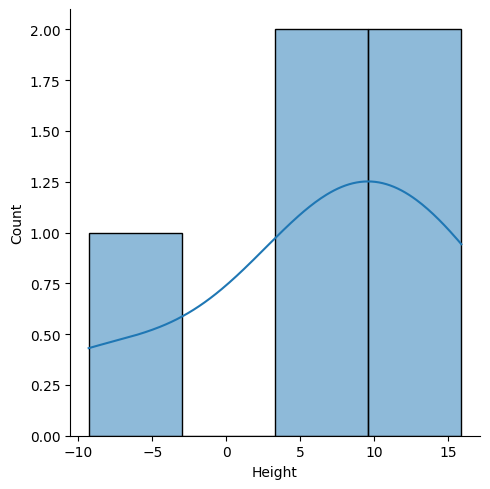

In [28]:
sns.displot(residuals, kde=True)

<Axes: ylabel='Height'>

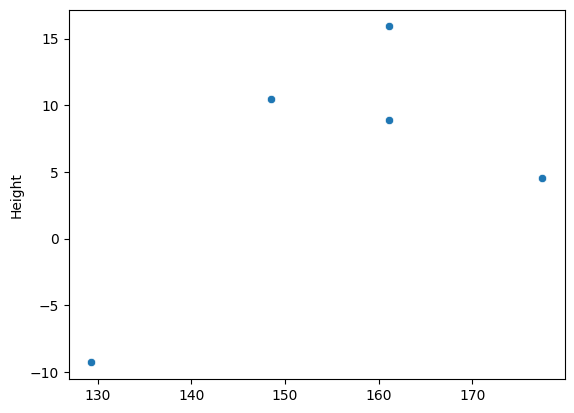

In [31]:
sns.scatterplot(x=y_pred, y=residuals)